In [2]:
import pandas as pd
import numpy as np
housing=pd.read_csv("../datasets/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# Test case spliting

In [3]:
import pandas as pd
import numpy as np
housing["income_cat"]=pd.cut(housing["median_income"],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Visualiztion

<Axes: xlabel='longitude', ylabel='latitude'>

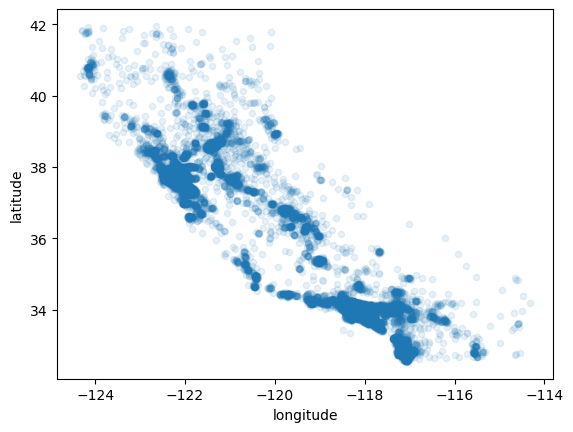

In [4]:
housing = strat_train_set.copy()
#longitudnal and latitudnal insight
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.1
)

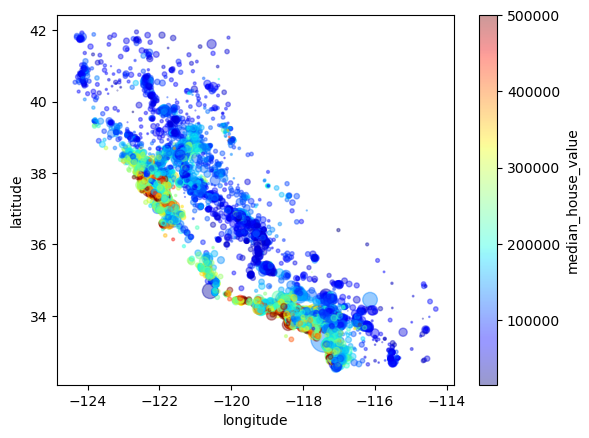

In [6]:
#BIG INSIGHT
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    alpha=0.4,
    s=housing["population"] / 100,
    c="median_house_value",
    cmap="jet",
    colorbar=True
)
import matplotlib.pyplot as plt
plt.savefig("../outputs/california_housing_prices_map.png")
plt.show()


# Looking for Correlation

In [5]:
corr_matrix=housing.corr(numeric_only=True)
corr_matrix["median_house_value"]

longitude            -0.047466
latitude             -0.142673
housing_median_age    0.114146
total_rooms           0.135140
total_bedrooms        0.047781
population           -0.026882
households            0.064590
median_income         0.687151
median_house_value    1.000000
Name: median_house_value, dtype: float64

### Plotting

<Axes: xlabel='median_income', ylabel='median_house_value'>

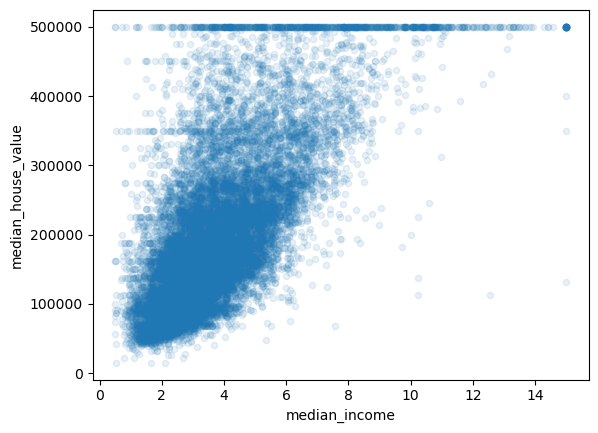

In [6]:
housing.plot(
    kind="scatter",
    x="median_income",
    y="median_house_value",
    alpha=0.1
)

### Using Pandas Scatter Matrix Function

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

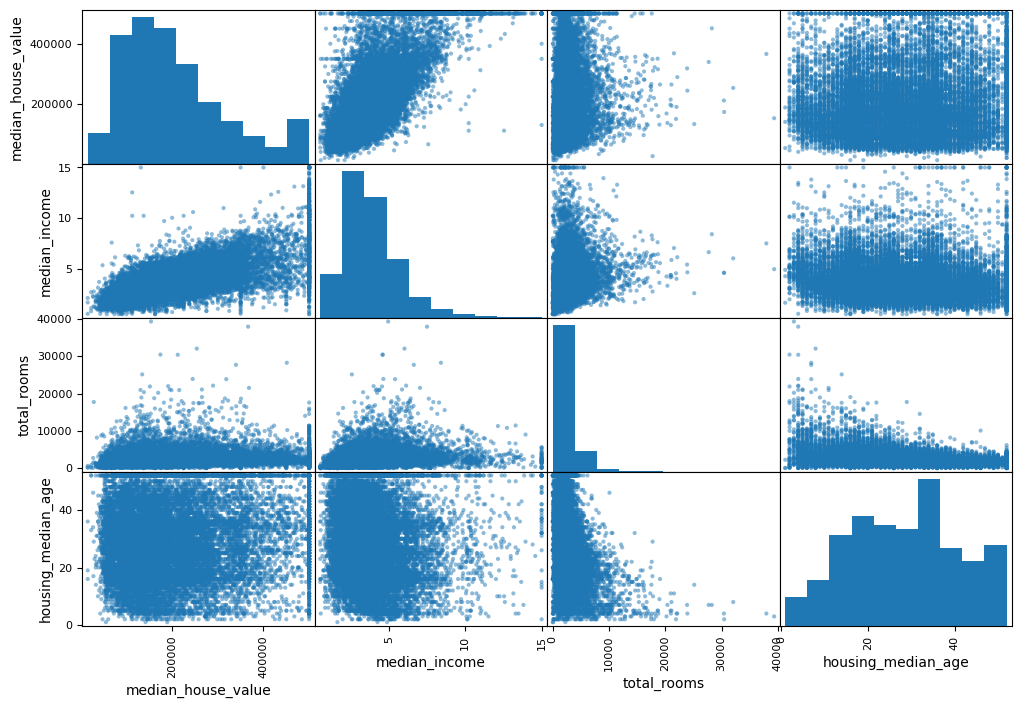

In [7]:
from pandas.plotting import scatter_matrix

attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age"
]

scatter_matrix(housing[attributes], figsize=(12, 8))


# Preparing Data for Machine Learning

In [8]:
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)

In [9]:
##handling missing values(Imputation)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
housing_num_tr = imputer.transform(housing_num)
##covert it back to dataframe
housing_num_tr=pd.DataFrame(housing_num_tr,columns=housing_num.columns,index=housing_num.index)

In [10]:
from sklearn.preprocessing import OneHotEncoder
housing_cat=housing[["ocean_proximity"]]
encoder=OneHotEncoder()
housing_cat_tr=encoder.fit_transform(housing_cat)

In [11]:
from scipy.sparse import hstack

final_housing = hstack([housing_num_tr, housing_cat_tr])

# Model Training(Linear regression)

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(final_housing,housing_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
#Snaity Check
some_data = final_housing.tocsr()[:5]
some_labels = housing_labels.iloc[:5]
print("Prediction: ",lin_reg.predict(some_data))
print("\nActual: ",list(some_labels))

Prediction:  [ 88939.33976582 304704.33137822 154044.49095979 183885.54853155
 246891.88034003]

Actual:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [14]:
#Rmse Evaluation
from sklearn.metrics import mean_squared_error
housing_prediction=lin_reg.predict(final_housing)
lin_rmse=np.sqrt(mean_squared_error(housing_labels,housing_prediction))
lin_rmse

np.float64(69069.530648243)

In [15]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    lin_reg,
    final_housing,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

In [16]:
rmse_scores = np.sqrt(-scores)
rmse_scores

array([72244.93391537, 65442.38038417, 67712.6885114 , 69365.18311692,
       66778.60368791, 72988.36737354, 70535.33305767, 69438.31895998,
       66917.53985553, 70731.88619027])

In [17]:
rmse_scores.mean(), rmse_scores.std()

(np.float64(69215.52350527715), np.float64(2350.306282807253))

# Decision Tree Regression

In [18]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(final_housing,housing_labels)
#Evaluate on Training Data
from sklearn.metrics import mean_squared_error
import numpy as np
housing_prediction=tree_reg.predict(final_housing)
tree_rms=np.sqrt(mean_squared_error(housing_labels,housing_prediction))
tree_rms

np.float64(0.0)

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    tree_reg,
    final_housing,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores.mean(), tree_rmse_scores.std()

(np.float64(69092.16551569055), np.float64(2305.8465831988815))

# Random Forest Regressor

In [20]:
from sklearn.ensemble import RandomForestRegressor 
forest_reg=RandomForestRegressor(
    n_estimators=100,
    random_state=42
)
forest_reg.fit(final_housing, housing_labels)
#RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = forest_reg.predict(final_housing)
forest_rmse = np.sqrt(mean_squared_error(housing_labels, housing_predictions))
forest_rmse

np.float64(18340.528177773096)

In [21]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(
    forest_reg,
    final_housing,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)
forest_rmse_scores = np.sqrt(-scores)
forest_rmse_scores.mean(), forest_rmse_scores.std()

(np.float64(49429.197374838055), np.float64(2121.8163210319776))

# FINE-TUNE THE RANDOM FOREST (GRID SEARCH)

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"n_estimators": [30, 50, 100], "max_features": [4, 6, 8]},
    {"bootstrap": [False], "n_estimators": [30, 50], "max_features": [4, 6]}
]


In [23]:
forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    return_train_score=True
)

grid_search.fit(final_housing, housing_labels)


,estimator,RandomForestR...ndom_state=42)
,param_grid,"[{'max_features': [4, 6, ...], 'n_estimators': [30, 50, ...]}, {'bootstrap': [False], 'max_features': [4, 6], 'n_estimators': [30, 50]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,50


In [24]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 50}

In [25]:
best_model = grid_search.best_estimator_

best_predictions = best_model.predict(final_housing)
best_rmse = np.sqrt(mean_squared_error(housing_labels, best_predictions))

best_rmse

np.float64(2.7514090822675743)

In [26]:
cv_results = grid_search.cv_results_

for mean_score, params in zip(
    cv_results["mean_test_score"],
    cv_results["params"]
):
    print(np.sqrt(-mean_score), params)


50367.43872748804 {'max_features': 4, 'n_estimators': 30}
49972.668762474685 {'max_features': 4, 'n_estimators': 50}
49594.0423207382 {'max_features': 4, 'n_estimators': 100}
50175.05293791187 {'max_features': 6, 'n_estimators': 30}
49667.21694358706 {'max_features': 6, 'n_estimators': 50}
49379.85620215207 {'max_features': 6, 'n_estimators': 100}
49950.00593381623 {'max_features': 8, 'n_estimators': 30}
49492.23954440944 {'max_features': 8, 'n_estimators': 50}
49166.48748569381 {'max_features': 8, 'n_estimators': 100}
49606.74249308392 {'bootstrap': False, 'max_features': 4, 'n_estimators': 30}
49277.74377623822 {'bootstrap': False, 'max_features': 4, 'n_estimators': 50}
49301.4064899811 {'bootstrap': False, 'max_features': 6, 'n_estimators': 30}
49085.953920396954 {'bootstrap': False, 'max_features': 6, 'n_estimators': 50}


# ANALYZE THE BEST MODEL & ITS ERRORS

In [27]:
feature_importances = best_model.feature_importances_
feature_importances


array([1.26000966e-01, 1.17145093e-01, 4.67095416e-02, 3.55726184e-02,
       2.78043748e-02, 4.32703015e-02, 2.73218310e-02, 4.09433753e-01,
       1.81805669e-02, 1.35306979e-01, 4.35615407e-05, 4.65178509e-03,
       8.55862892e-03])

In [28]:
num_features = housing_num_tr.columns.tolist()
cat_features = encoder.get_feature_names_out(["ocean_proximity"])
all_features = num_features + list(cat_features)


import pandas as pd

feature_importance_df = pd.DataFrame({
    "feature": all_features,
    "importance": feature_importances
})

feature_importance_df.sort_values(by="importance", ascending=False)


final_predictions = best_model.predict(final_housing)

errors = final_predictions - housing_labels


pd.Series(errors).describe()


count    16512.000000
mean         0.000000
std          2.751492
min       -250.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        250.000000
Name: median_house_value, dtype: float64

# Evaluate the model on the Test Set

In [29]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()


X_test_num = X_test.drop("ocean_proximity", axis=1)
X_test_num_tr = imputer.transform(X_test_num)

X_test_num_tr = pd.DataFrame(
    X_test_num_tr,
    columns=X_test_num.columns,
    index=X_test_num.index
)

X_test_cat = X_test[["ocean_proximity"]]
X_test_cat_tr = encoder.transform(X_test_cat)

from scipy.sparse import hstack
X_test_prepared = hstack([X_test_num_tr, X_test_cat_tr])

final_predictions = best_model.predict(X_test_prepared)


In [30]:
from sklearn.metrics import mean_squared_error
import numpy as np

final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_rmse


np.float64(46611.30631312032)

In [31]:
import os
os.makedirs("../models", exist_ok=True)

In [32]:
import joblib
joblib.dump(best_model, "../models/random_forest_housing.pkl")

['../models/random_forest_housing.pkl']

In [33]:
joblib.dump(imputer, "../models/imputer.pkl")
joblib.dump(encoder, "../models/encoder.pkl")


['../models/encoder.pkl']